In [3]:
import numpy as np
import scipy.ndimage.filters as filters
import scipy.ndimage.morphology as morphology
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [17]:
# Data to plot.
x, y = np.meshgrid(np.arange(10), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.5 * y)

In [18]:
z.shape

(10, 10)

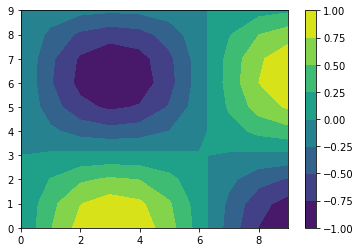

In [23]:
plt.contourf(z)
plt.colorbar()

In [36]:
def detect_local_minima(arr):
    # from answer: https://stackoverflow.com/a/3986876/
    # https://stackoverflow.com/questions/3684484/peak-detection-in-a-2d-array/3689710#3689710
    """
    Takes an array and detects the troughs using the local maximum filter.
    Returns a boolean mask of the troughs (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """
    # define an connected neighborhood
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#generate_binary_structure
    neighborhood = morphology.generate_binary_structure(len(arr.shape),2)
    # apply the local minimum filter; all locations of minimum value 
    # in their neighborhood are set to 1
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.filters.html#minimum_filter
    local_min = (filters.minimum_filter(arr, footprint=neighborhood)==arr)
    # local_min is a mask that contains the peaks we are 
    # looking for, but also the background.
    # In order to isolate the peaks we must remove the background from the mask.
    # 
    # we create the mask of the background
    background = (arr==0)
    # 
    # a little technicality: we must erode the background in order to 
    # successfully subtract it from local_min, otherwise a line will 
    # appear along the background border (artifact of the local minimum filter)
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#binary_erosion
    eroded_background = morphology.binary_erosion(
        background, structure=neighborhood, border_value=1)
    # 
    # we obtain the final mask, containing only peaks, 
    # by removing the background from the local_min mask
    detected_minima = local_min ^ eroded_background
    return np.where(detected_minima)      

In [25]:
minima = detect_local_minima(z)

In [26]:
z[minima]

array([ 0.        , -0.97753012,  0.        ,  0.        , -0.98751255])

In [40]:
minima

[(array([0, 0, 1, 2, 6]),), (array([0, 9, 0, 0, 3]),)]

In [35]:
z[3,0]

0.0